In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
For this section we will import a dataset from sklearn. It contains several columns for Iris Flowers with different sepal length/width and petal length/width. We use this preset dataset as an example, because its hard to manually create a fitting example on your own.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df["target"] = iris.target

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# KMeans

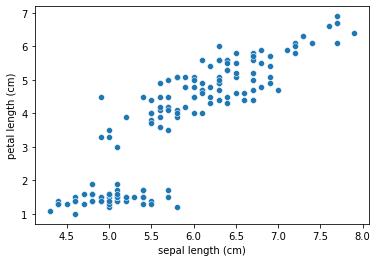

In [48]:
from sklearn.cluster import KMeans

# Preparing Data (we will only pick 2 columns to make it easier to visually compare)
x = df[["sepal length (cm)", "petal length (cm)"]]

# This DataFrame contains the real groups/clusters, so we can compare our algorithm against this
real = df[["sepal length (cm)", "petal length (cm)", "target"]]

# Plotting the real groups (It is really important to take a look a the raw Data before to estimate the amount of clusters!)
sns.scatterplot(data = real, x = "sepal length (cm)", y = "petal length (cm)");

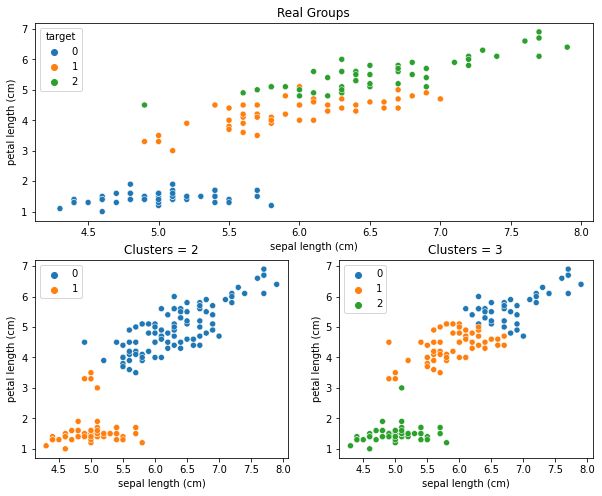

In [49]:
# Creating Model (we will choose two clustering values with 2 and 3)
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (10, 8))
gs = GridSpec(2, 2)

for i in range(2, 4):
    kmeans = KMeans(n_clusters = i, init = "random", n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(x)
    
    ax = fig.add_subplot(gs[1, i-2], title = f"Clusters = {i}")
    sns.scatterplot(data = x, x = "sepal length (cm)", y = "petal length (cm)", hue = kmeans.labels_, palette='tab10', ax=ax); 
    
ax = fig.add_subplot(gs[0, :], title = "Real Groups")
sns.scatterplot(data = real, x = "sepal length (cm)", y = "petal length (cm)", hue = "target", palette='tab10');

<u>Ignore the mismatching colors</u>, since clustering is not about assigning the same labels (that would be classification) and more to divide the data into cluster groups.